# Random Number Generators 
-------------------------------------------------
Below are some algorithms, code snippets and graphs showing you how some of the popular pseudo-random number generators work and how we use them to be helpful when building other programs. 

In [18]:
def von_neumann(seed, n):
    random_numbers = []
    number = seed
    for i in range(n):
        convert_str = str(number ** 2)
        l = len(convert_str)
        half = l // 2
        if l % 2 == 1:
            convert_str = '0' + convert_str
            half = (l + 1) // 2
        rn = int(convert_str[(half // 2):(half + half // 2)])
        random_numbers.append(rn)
        number = rn
    return random_numbers
rn = von_neumann(9999, 100)

### Linear Congruential Generator
One of the most common (and fairly simple) algorithms for generating random numbers. It is defined recursively using the following formula: 

$$ X_{t + 1} = (aX_t + c)\text{ mod m }$$ 

Where $a$ is a scaling factor between 0 and m (not inclusive), $s$ is an additive constant between the same values and $m$ is the modulus. $X_t$ is our 'random' number at step $t$. When $t = 0$ we have our initial seed. Let's get the first 9999 numbers when $X_0 = 1, m = 2^{31}, a = 65539, c = 0 $

In [122]:
def nextLCG(current_number, m, a, c):
    return ((a * current_number + c) % m)

def LCG_sequence(seed, t):
    sequence = [seed]
    current = seed 
    for i in range(t):
        new_number = nextLCG(current, 2**31, 65539, 0)
        sequence.append(new_number)
        current = new_number
    return sequence
        
RANDU = LCG_sequence(1.0, 9999)

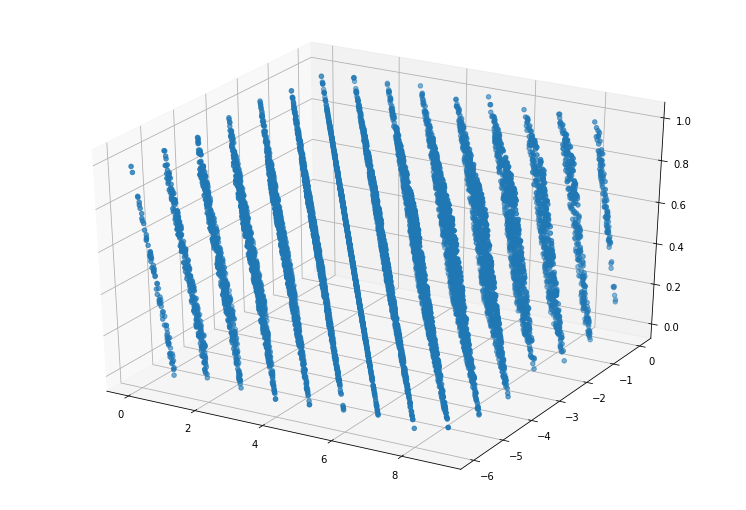

In [127]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

points = np.zeros(shape=(len(RANDU) - 2, 3))
for i, val in enumerate(RANDU[:len(RANDU) - 2]):
    points[i][0] = RANDU[i] / (2**31)
    points[i][1] = RANDU[i + 1] / (2**31)
    points[i][2] = RANDU[i + 2] / (2**31)
    
fig = plt.figure(figsize=(13, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(9*points[:, 0], -6*points[:, 1], points[: ,2])
plt.show()

That might have seemed like contrived example, but it was to show the pitfalls of the LCG model. This is the sequence known as [RANDU](https://oeis.org/A096555) developed at IBM and whilst it was quick to generate numbers it also wasn't very random! Mathematically this can be seen. 

If we take an triplet of numbers from the sequence $x_k, x_{k+1}, x_{k+2}$ then we can show that under certain conditions they fall into these planes you see above. An important point is that $65539 = 2^{16} + 3$

So $x_k$ is our starting point, $x_{k+1} = (2^{16} + 3)x_k$ and $x_{k+2} = (2^{16} + 3)^2x_k $ All of this algebra is performed modulus $2^{31}$

If we then expand the quadratic just like we normally would it becomes $(2^{32} + 6 \cdot 2^{16} + 9)$. However $2^{32} mod 2{31} = 0$ leaving $x_{k+2} = (6 \cdot 2^{16} + 9)x_k $. Pulling it altogether: 
$$x_{k+1} = (2^{16} + 3)x_k \text{ and } x_{k+2} = (6 \cdot 2^{16} + 9)x_k \implies x_{k+2} = 6x_{k+1} - 9x_k$$

*Not very random afterall...*